In [1]:
!pip install imageio

In [2]:
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp 
%matplotlib inline 

In [8]:
source_img = imageio.imread("./smile_img.jpg")

C:\Users\brije\AppData\Local\Temp\ipykernel_8464\1918849768.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread("./smile_img.jpg")


In [14]:

# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

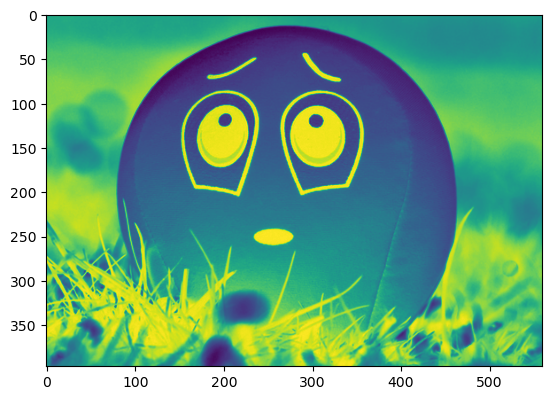

In [16]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

C:\Users\brije\AppData\Local\Temp\ipykernel_8464\3056666291.py:3: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


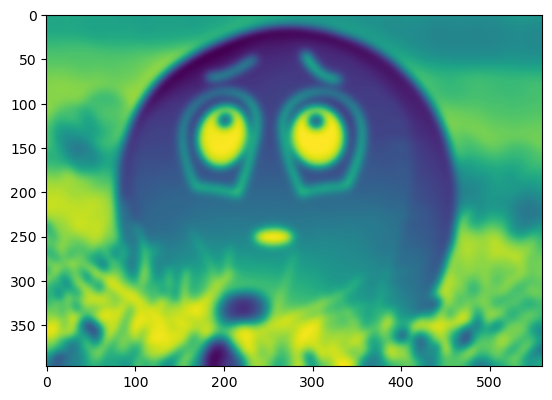

In [18]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)
     

In [20]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')
     

In [22]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

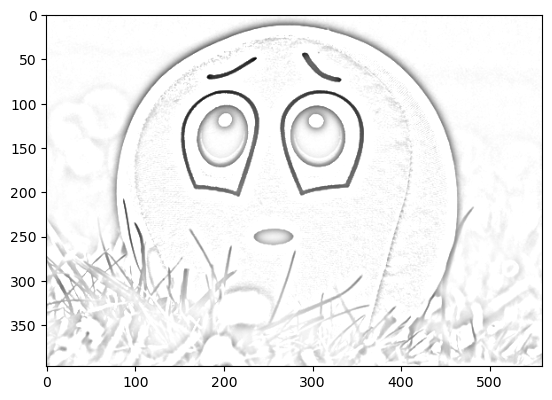

In [24]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [26]:
#Save the image
plt.imsave('sketch_img.png', target_img, cmap='gray', vmin=0, vmax=255)